In [35]:
import pandas as pd
from konlpy.tag import Mecab
from hanspell import spell_checker
from transformers import AutoTokenizer
tagger = Mecab("C:/mecab/mecab-ko-dic")

%matplotlib inline

In [31]:
train = pd.read_csv("./RawData/train_data.csv").drop("index", axis = "columns")
external = pd.read_csv("./RawData/external data/snli_1.0_train.ko.tsv", sep = "\t")
external.columns = ["premise", "hypothesis", "label"]
external = external.loc[external.premise.str.len() < train.premise.str.len().max(), :]
external = external.loc[external.hypothesis.str.len() < train.hypothesis.str.len().max(), :].reset_index(drop = True)

In [38]:
train.premise.apply(lambda x : len(x.split(' '))).min()

1

<AxesSubplot:>

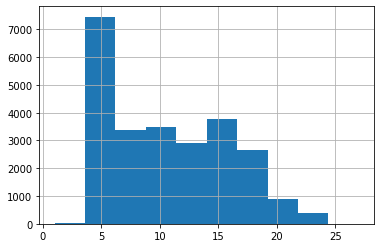

In [36]:
train.premise.apply(lambda x : len(x.split(' '))).hist()

In [26]:
train = pd.read_csv("./RawData/train_data.csv").drop("index", axis = "columns")

external = pd.read_csv("./RawData/external data/snli_1.0_train.ko.tsv", sep = "\t")
external.columns = ["premise", "hypothesis", "label"]
external = external.loc[external.premise.str.len() < train.premise.str.len().max(), :]
external = external.loc[external.hypothesis.str.len() < train.hypothesis.str.len().max(), :].reset_index(drop = True)

train = pd.concat([train, external], axis = 0)

In [27]:
train.groupby("label").count()

,premise,hypothesis
label,,
contradiction,191011,191011
entailment,191085,191085
neutral,190470,190470


<AxesSubplot:>

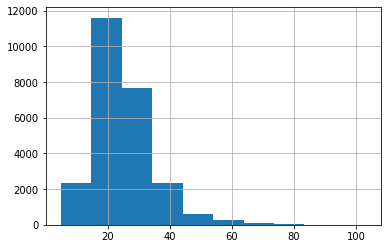

In [71]:
train.hypothesis.str.len().hist()

<AxesSubplot:>

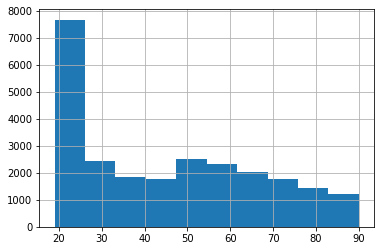

In [72]:
train.premise.str.len().hist()

In [94]:
train.sort_values("premise")

,premise,hypothesis,label
4536,100분간 잘껄 그래도 소닉붐땜에 2점준다,100분간 자는게 더 나았을 것 같다.,neutral
5186,100분간 잘껄 그래도 소닉붐땜에 2점준다,100분간 잤다.,contradiction
8060,100분간 잘껄 그래도 소닉붐땜에 2점준다,소닉붐이 정말 멋있었다.,neutral
24050,101빌딩 근처에 나름 즐길거리가 많습니다.,101빌딩 주변에 젊은이들이 즐길거리가 많습니다.,neutral
147,101빌딩 근처에 나름 즐길거리가 많습니다.,101빌딩 근처에서 즐길거리 찾기는 어렵습니다.,contradiction
...,...,...,...
9488,"힐링푸드 전문가 양성 교육 참여, 개발 음식 활용 등의 혜택도 주어진다.",개발 음식 활용 혜택만 주어진다.,contradiction
24945,"힐링푸드 전문가 양성 교육 참여, 개발 음식 활용 등의 혜택도 주어진다.",힐링푸드 전문가에게 혜택이 주어진다.,neutral
15014,힛걸 진심 최고다 그 어떤 히어로보다 멋지다,힛걸 그 어떤 히어로보다 별로다.,contradiction
8171,힛걸 진심 최고다 그 어떤 히어로보다 멋지다,힛걸 액션 장면 진심 그 어떤 히어로보다 멋지다.,neutral


In [88]:
train.hypothesis.str.contains("[a-zA-Z]").sum()

45

In [44]:
morphed_premise = train.premise.apply(lambda x : tagger.morphs(x))
morphed_hypothesis = train.hypothesis.apply(lambda x : tagger.morphs(x))

In [45]:
morphed_premise

0        [씨름, 은, 상고, 시대, 로부터, 전해져, 내려오, 는, 남자, 들, 의, 대표...
1        [삼성, 은, 자작극, 을, 벌인, 2, 명, 에게, 형사, 고소, 등, 의, 법,...
2        [이, 를, 위해, 예측, 적, 범죄, 예방, 시스템, 을, 구축, 하, 고, 고도...
3        [광주, 광역시, 가, 재, 개발, 정비, 사업, 원주민, 들, 에, 대한, 종합,...
4        [진정, 소비자, 와, 직원, 들, 에게, 사랑, 받, 는, 기업, 으로, 오래, ...
                               ...                        
24993    [오페라, 에, 비하, 여, 오라토리오, 에서, 는, 독창, 보다, 도, 합창, 이...
24994                   [지하철역, 까지, 걸어서, 5, 분, 정도, 걸립니다, .]
24995    [한편, 이날, 중앙, 방역, 대책, 본부, 는, 집단, 감염, 이, 발생, 한, ...
24996    [마미손, 이, 랩, 을, 하, 자, 시청자, 들, 은, 그, 의, 정체, 를, 파...
24997    [집, 근처, 에, 지하철역, ,, 버스, 정류장, 이, 있, 기, 때문, 에, 다...
Name: premise, Length: 24998, dtype: object

0        [씨름, 은, 상고, 시대, 로부터, 전해져, 내려오, 는, 남자, 들, 의, 대표...
1        [삼성, 은, 자작극, 을, 벌인, 2, 명, 에게, 형사, 고소, 등, 의, 법,...
2        [이, 를, 위해, 예측, 적, 범죄, 예방, 시스템, 을, 구축, 하, 고, 고도...
3        [광주, 광역시, 가, 재, 개발, 정비, 사업, 원주민, 들, 에, 대한, 종합,...
4        [진정, 소비자, 와, 직원, 들, 에게, 사랑, 받, 는, 기업, 으로, 오래, ...
                               ...                        
24993    [오페라, 에, 비하, 여, 오라토리오, 에서, 는, 독창, 보다, 도, 합창, 이...
24994                   [지하철역, 까지, 걸어서, 5, 분, 정도, 걸립니다, .]
24995    [한편, 이날, 중앙, 방역, 대책, 본부, 는, 집단, 감염, 이, 발생, 한, ...
24996    [마미손, 이, 랩, 을, 하, 자, 시청자, 들, 은, 그, 의, 정체, 를, 파...
24997    [집, 근처, 에, 지하철역, ,, 버스, 정류장, 이, 있, 기, 때문, 에, 다...
Name: premise, Length: 24998, dtype: object